In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [58]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [7]:
sal = pd.read_csv('https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/salary_dataset.csv')
sal.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


Сначала посмотрим на общую информацию о переменных в дата сете

In [8]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [10]:
sal[['Age', 'Years of Experience', 'Salary']].describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Видим, что значения количественных столбцов не выходят за логические рамки. 
Неадекватные значения отстуствуют (возвраст от 21 до 62; опыт от 0 до 34; зарплата от 350 до 250 000).
Также видим, что в данных присутствуют пропуски, но их количество незначительно.

Подсчитаем процент пропусков в данных

In [33]:
sal[['Age', 'Years of Experience', 'Salary']].isna().mean().round(4).map('{:.2%}'.format)

Age                    0.03%
Years of Experience    0.04%
Salary                 0.07%
dtype: object

In [ ]:
Видим, что пропусков меньше 1%

In [37]:
sal[['Gender','Job Title', 'Education Level', 'Country','Race']].describe()

,Gender,Job Title,Education Level,Country,Race
count,6702,6702,6701,6704,6704
unique,3,193,7,5,10
top,Male,Software Engineer,Bachelor's Degree,USA,White
freq,3674,518,2267,1360,1968


Видим, что значения качественных столбцов не выходят за логические рамки. 
Необходимо проверить, почему в столбце по гендеру 3 значения (нет ли ошибки в данных).
Также видим, что в данных присутствуют пропуски, но, как и в случае с количественными переменными,
их количество незначительно.

In [35]:
sal['Gender'].value_counts()

Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64

Видим, что тех, кто не указал, свою принадлежность к мужчинам или женщинам, значительное меньшинство,
Что согласуется с базовой логикой формирования полов

In [36]:
sal['Education Level'].value_counts()

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

В столбце об уровне образования видим, что столбцы 'Bachelor's Degree' и 'Bachelor's',
а также 'Master's Degree' и 'Master's' выделяются
в разные смысловые категории.
Также одно значение (phD) ошибочно выделяется в отдельную категорию из-за регистра.
Решим проблему с помощью метода replace.

In [48]:
sal['Education Level'].replace('phD', 'PhD', inplace=True)
sal['Education Level'].replace("Bachelor's", "Bachelor's Degree", inplace=True)
sal['Education Level'].replace("Master's", "Master's Degree", inplace=True)

In [49]:
sal['Education Level'].value_counts()

Education Level
Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
High School           448
Name: count, dtype: int64

In [52]:
sal['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: count, Length: 193, dtype: int64

Видим, что часть должностей являются похожими, например, 
Software Engineer и Software Engineer Manager, возможно, для определенных задач их стоит объединить их в более агрегированные сущности,
например, "IT-специальность","Финансы" и тд

In [40]:
sal['Country'].value_counts()

Country
USA          1360
China        1343
UK           1337
Australia    1336
Canada       1328
Name: count, dtype: int64

In [41]:
sal['Race'].value_counts()

Race
White               1968
Asian               1603
Korean               457
Australian           452
Chinese              444
Black                437
African American     354
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64

In [ ]:
в столбцах Country и Race неадекватных значений не обнаружено

<Axes: >

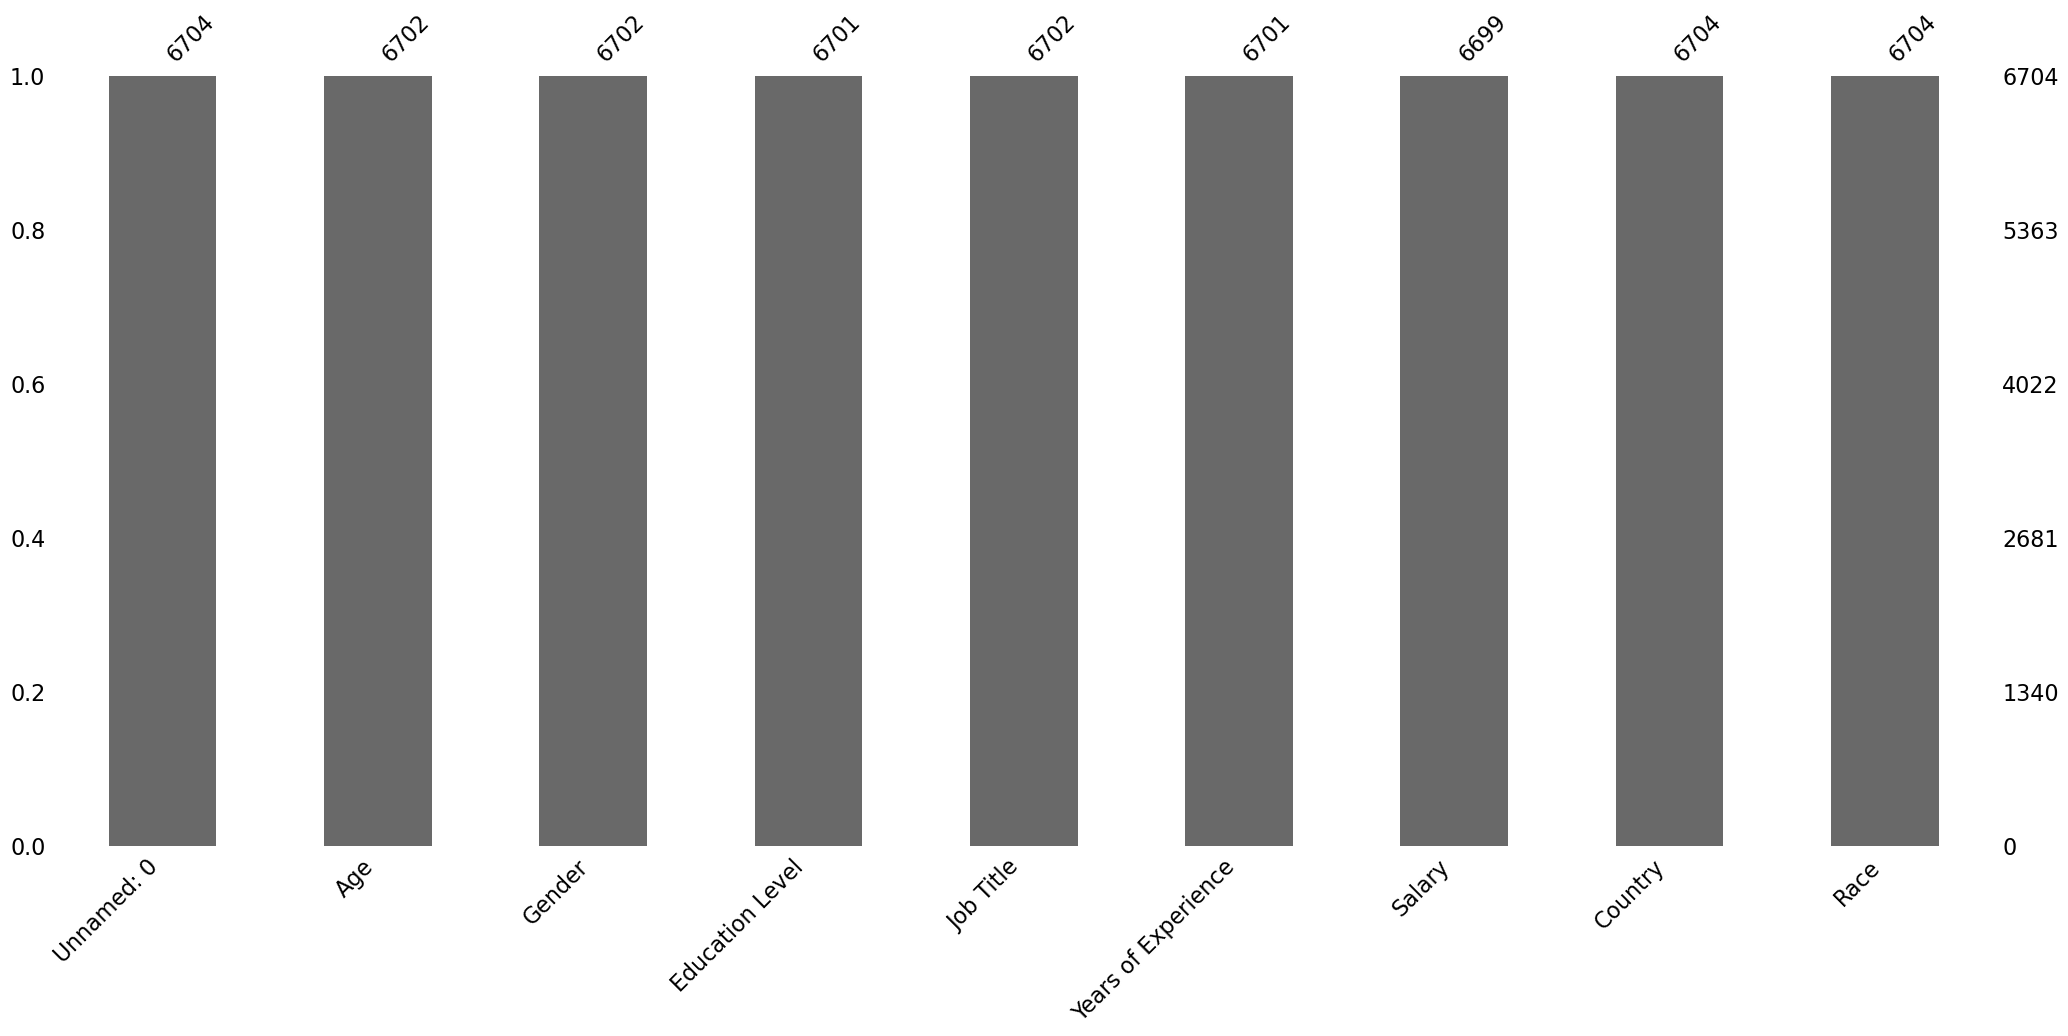

In [62]:
msno.bar(sal)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

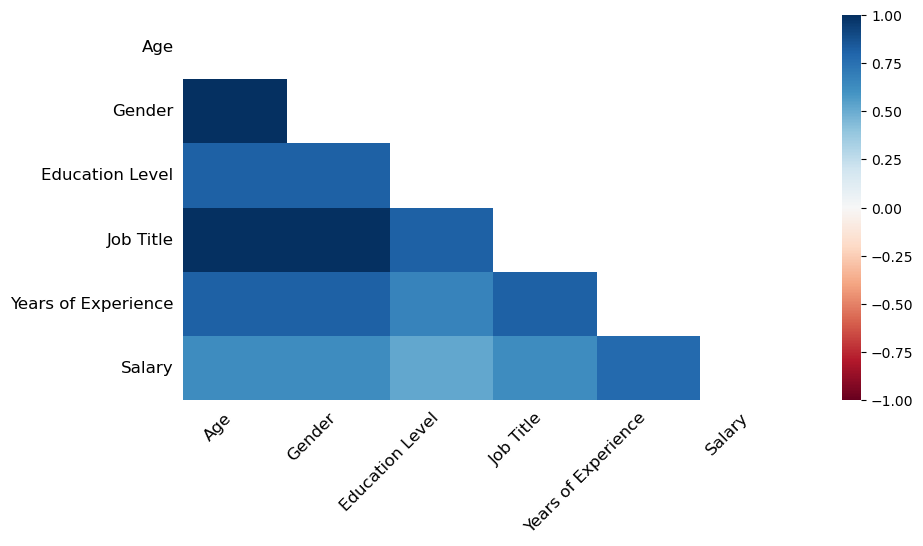

In [65]:
msno.heatmap(sal, figsize=(10,5), fontsize=12)

In [67]:
sal[sal.isna().any(axis=1)]

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
2011,2011,27.0,Male,NaN,Developer,7.0,100000.0,UK,White
3136,3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN,Canada,White
5247,5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White
6455,6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,Canada,White


Видим, что в пропусках данных присутствует значительная корреляция - иначе говоря,
если в одном столбце пропущены данные, то с большой доли вероятности они пропущены и в другом,
о чем свидетельствует выгрузка пропусков из датасета выше
Возможно, эти пропуски появились в результате технической ошибки или из-за того, что человек решил скрыть определенные данные о себе
Заметим, что, в основном, пропущены данные о зарплате - личная информация

1 вопрос - зарплата зависит от уровня образования

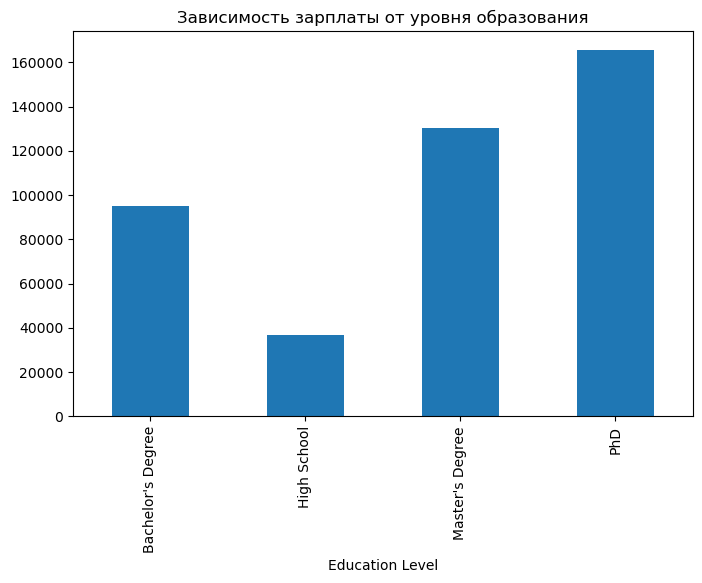

In [71]:
plt.figure(figsize=[8,5])
sal.groupby('Education Level')['Salary'].mean().plot(kind="bar")
plt.title("Зависимость зарплаты от уровня образования")
plt.show()

Судя по графику - зависимость есть - с ростом образования доход увеличивается

2 вопрос - рынок в данном опросе представлен молодыми или опытным специалистами?

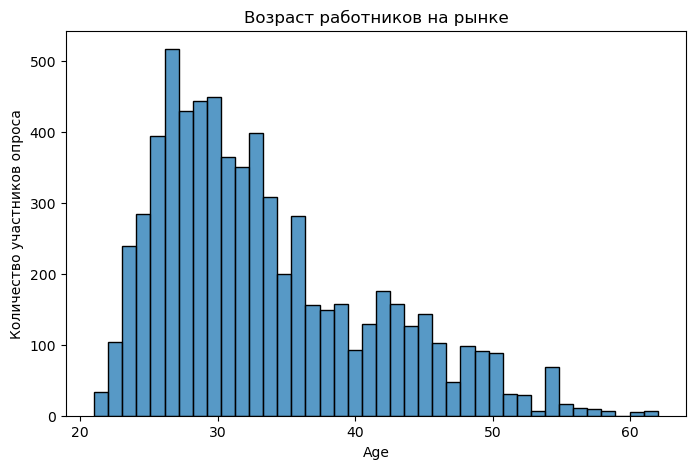

In [74]:
plt.figure(figsize=[8,5])
sns.histplot(data=sal, x="Age", bins=40)
plt.title("Возраст работников на рынке")
plt.ylabel("Количество участников опроса")
plt.show()

Ответ - опытными специалистами

3 вопрос - наиболее обеспеченными являются белые американцы

In [81]:
race_country = pd.pivot_table(data=sal, index='Race', columns='Country', values= 'Salary', aggfunc='mean')
race_country

Country,Australia,Canada,China,UK,USA
Race,,,,,
African American,NaN,NaN,NaN,NaN,112209.658192
Asian,114408.016807,115159.859341,NaN,118621.178571,113442.107143
Australian,114236.676991,NaN,NaN,NaN,NaN
Black,NaN,118601.212815,NaN,NaN,NaN
Chinese,NaN,NaN,111139.315315,NaN,NaN
Hispanic,NaN,NaN,NaN,NaN,110410.139752
Korean,NaN,NaN,117099.757112,NaN,NaN
Mixed,NaN,NaN,NaN,116330.859281,NaN
Welsh,NaN,NaN,NaN,112560.645646,NaN


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


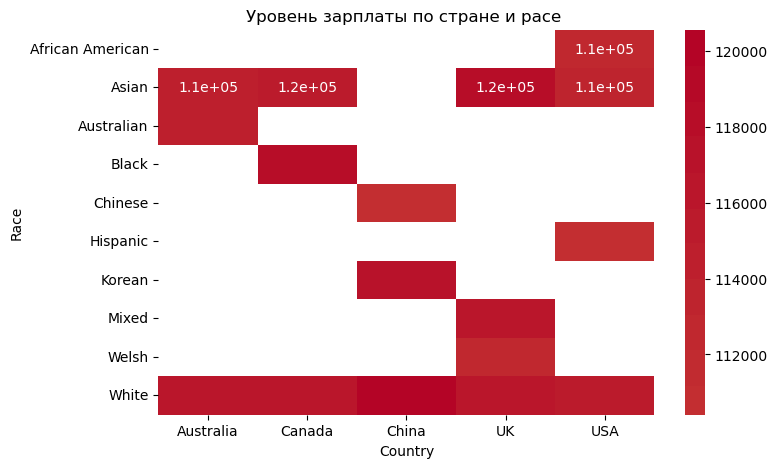

In [83]:
plt.figure(figsize=[8,5])
sns.heatmap(race_country, annot=True, cmap='coolwarm',center=0.117)
plt.title("Уровень зарплаты по стране и расе ")
plt.show()

Ответ - наиболее обеспеченными являются афроамериканцы и азиаты из Америки